## <p style="text-align: center;">**Laboratory Session** : April 16, 2023</p>
#### <p style="text-align: center;">Exercises due on : April 30, 2023</p>

**Student**: Cavezza Lorenzo <br>
**Matricola**: 2130648

In [ ]:
install.packages("actuar")

In [ ]:
library("glue")
library("lubridate")
library(ggplot2)
library(tidyverse)
library(actuar)

### Exercise 1 - Discrete random variable

- the probability distribution function of a discrete variable k is given by the zero-truncated Poisson
distribution:<br>
#### <center>$P(k)=\frac{\lambda^k e^{-\lambda}}{k!(1-e^{-\lambda})}$ for  k=1,2,3, . . .
1) Write the R functions for the probability density and cumulative distribution functions, using the
R naming convention.

In [619]:
lambda=1.4
k<-(1:8)
pdf<-dztpois(k,lambda,log=FALSE)
cdf<-pztpois(k, lambda, lower.tail = TRUE, log.p = FALSE)

- Assuming $\lambda$=**1.4**
2) Produce two plots showing the pdf and cdf, separately.

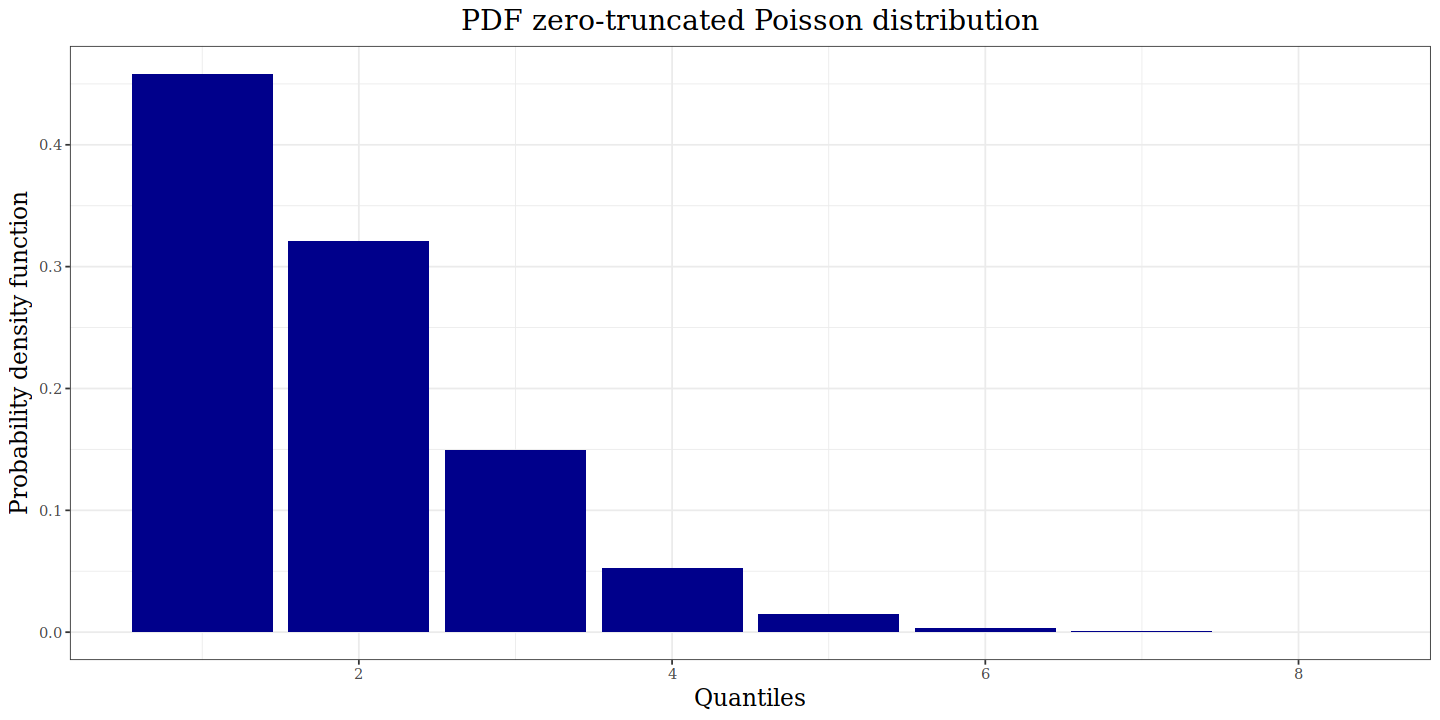

In [620]:
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data.frame(k,pdf), aes(x=k, y=pdf)) + 
  geom_bar(fill="darkblue",stat = "identity")+
labs(
title="PDF zero-truncated Poisson distribution",
y="Probability density function",
x="Quantiles"
)
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

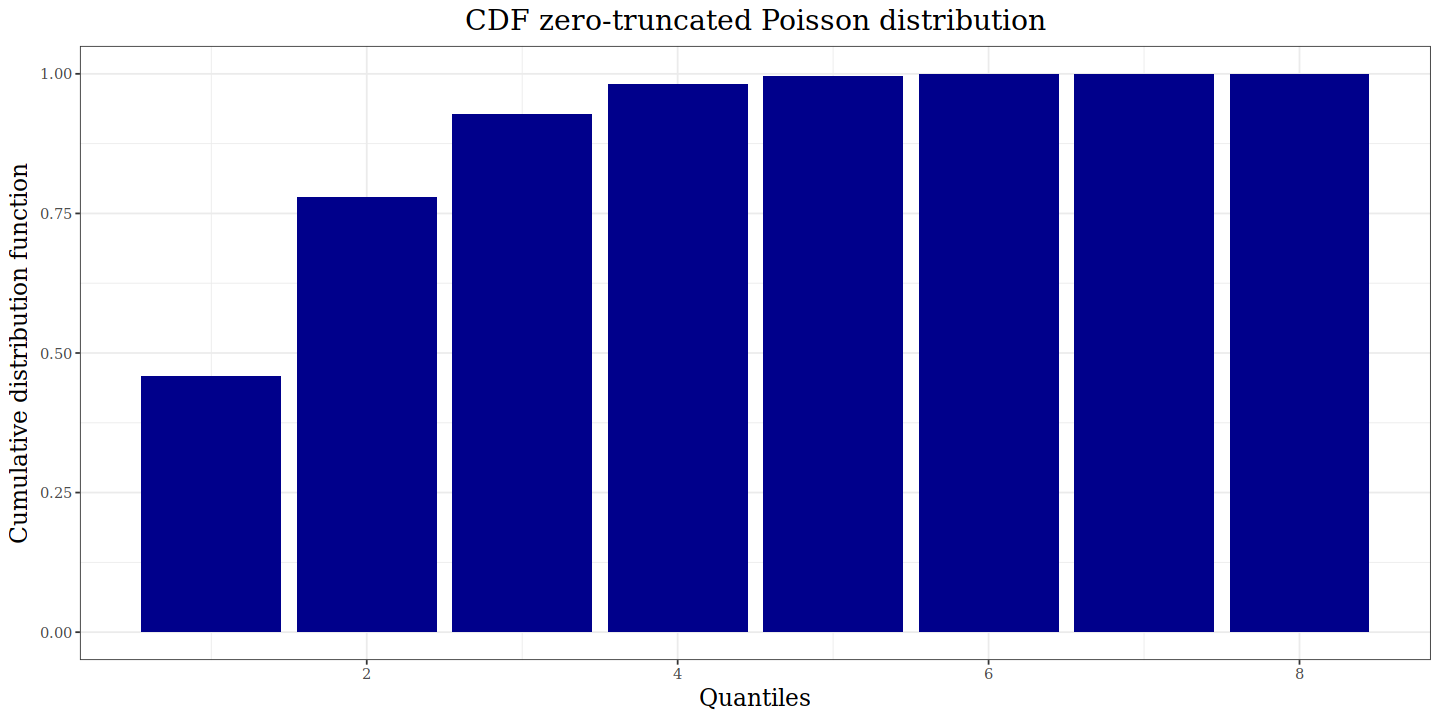

In [621]:
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data.frame(k,cdf), aes(x=k, y=cdf)) + 
  geom_bar(fill="darkblue",stat = "identity")+
labs(
title="CDF zero-truncated Poisson distribution",
y="Cumulative distribution function",
x="Quantiles"
)
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

3) Compute the mean value and variance of the probability distribution using R.

In [626]:
mean=sum(k*pdf)
var=sum(pdf*(k-1.86)^2)
cat("The probability distribution mean is",round(mean,2),"and its variance is",round(var,2))

The probability distribution mean is 1.86 and its variance is 1.01

4) Generate a sample of random numbers from this distribution and show them in an histogram.
Evaluate the sample mean.

In [661]:
n=100000
numbers<-rztpois(n,lambda)

The mean is 1.86 and the variance is 1.01

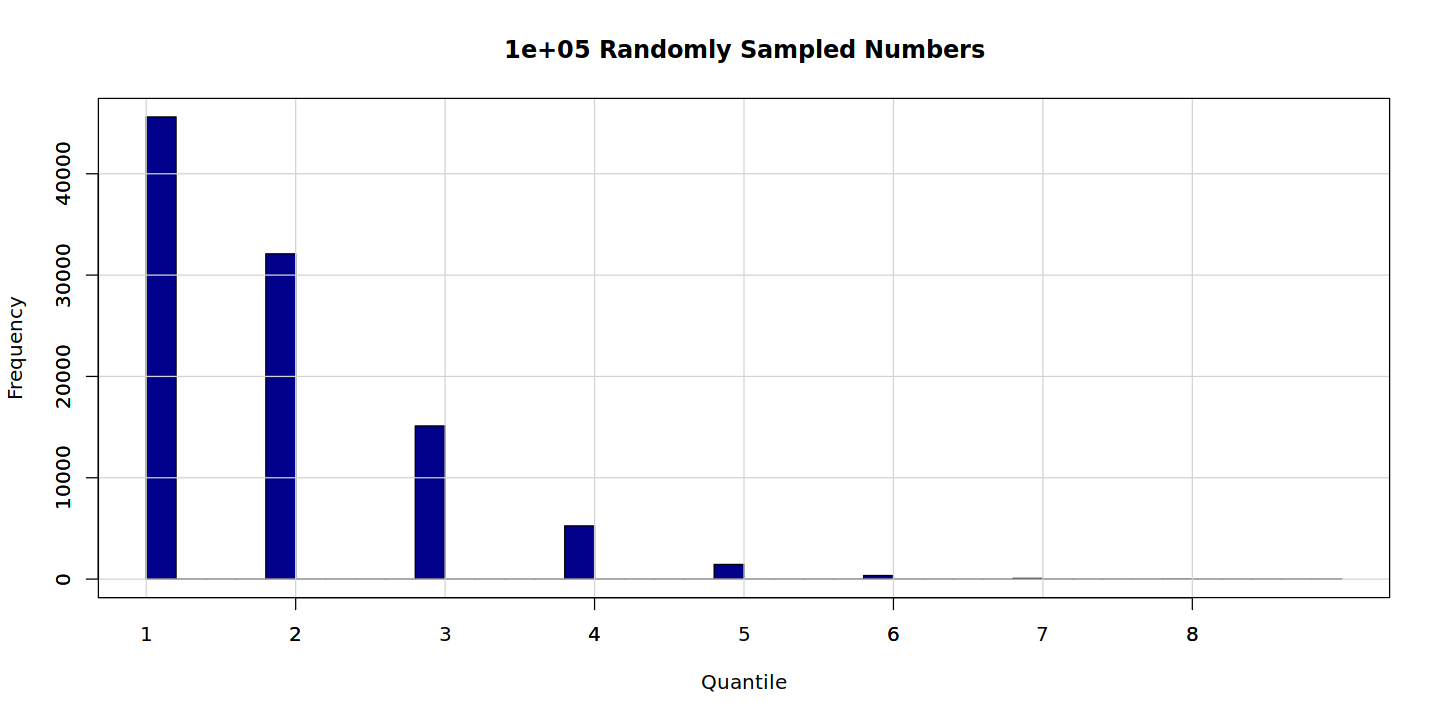

In [676]:
options(repr.plot.width = 12, repr.plot.height = 6)
h<-hist(x=numbers, main=paste(n,"Randomly Sampled Numbers"), xlim=c(min(numbers),max(numbers)),
    ,breaks=30, col="darkblue", xlab="Quantile")
axis(1, at=seq(0,length(k), 1), labels=seq(0,length(k), 1),tck=1,col.ticks="light gray")
axis(2, tck=1, col.ticks="light gray")
box()
mean=mean(numbers)
var=sd(numbers)^2
cat("The mean is",round(mean,2),"and the variance is",round(var,2))

### Exercise 2 - Continuous random variable

- The energy distribution of CR muons at sea level can be approximated as follows
#### <center> $p(E)=N\begin{cases} 1&for&E<E_0\\(\frac{1}{E-E_0+1})^{-\gamma}&for&E \geq E_0\end{cases}$ </center>
consider: $E_0=7.25 GeV, \gamma=2.7$
    
a) Compute the normalisation factor N using R.

In [584]:
E0=7.25
gamma=2.7
crpdf<-function(x){
if (x<E0){
    return (1)}
else{
    return (((x-E0+1))**(-gamma))}
}

In [586]:
N<-integrate(Vectorize(crpdf),lower=0,upper=Inf)$value
Emax=15
Emin=0
npoints=10000
E <- seq(Emin, Emax, length = npoints)
dE <- (Emax-Emin)/npoints
values<-apply(X=data.frame(E),MARGIN=1,FUN=crpdf)/N
cat("N:",N)

N: 7.838237

b) Plot the probability density function in R.

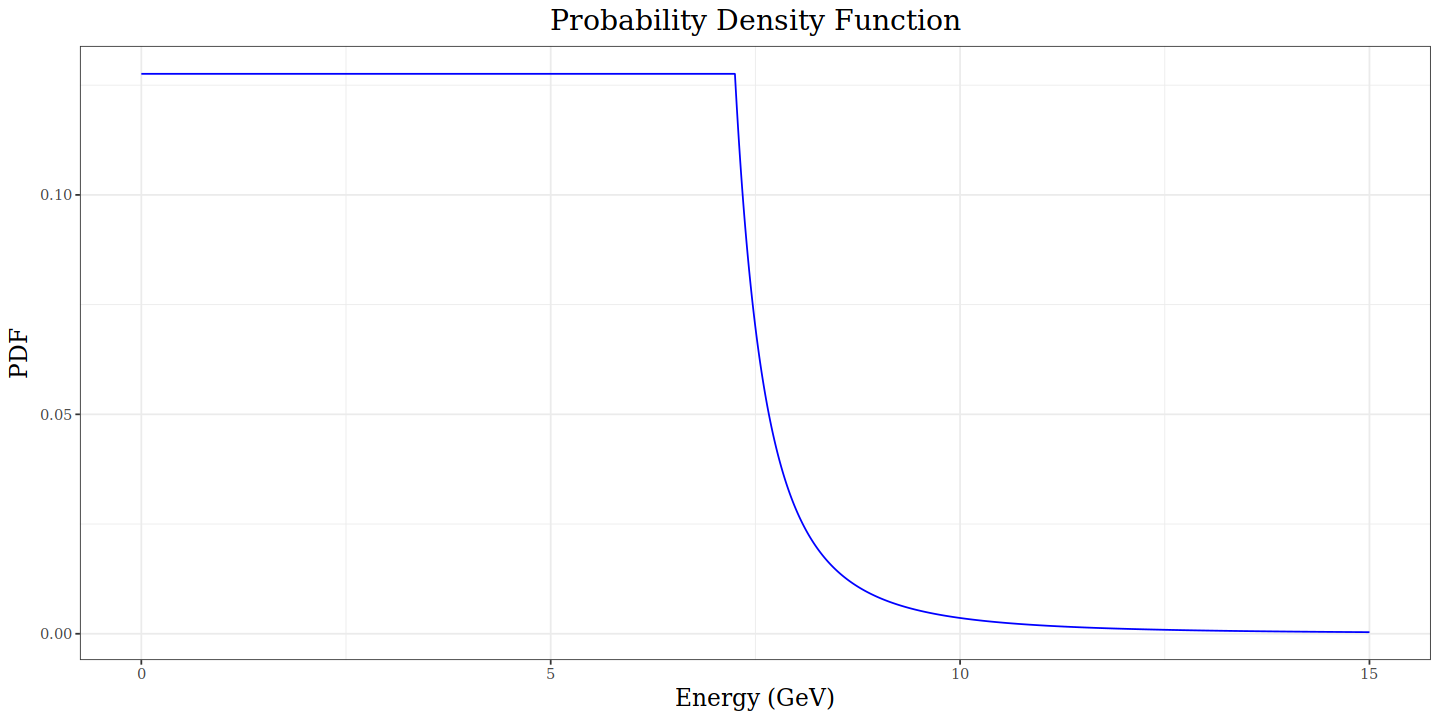

In [166]:
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data=data.frame(E,values), aes(x=E, y=values, group=1)) +
  geom_line(color="blue")+
labs(
title="Probability Density Function",
y="PDF",
x="Energy (GeV)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))


c) Plot the cumulative density function in R.

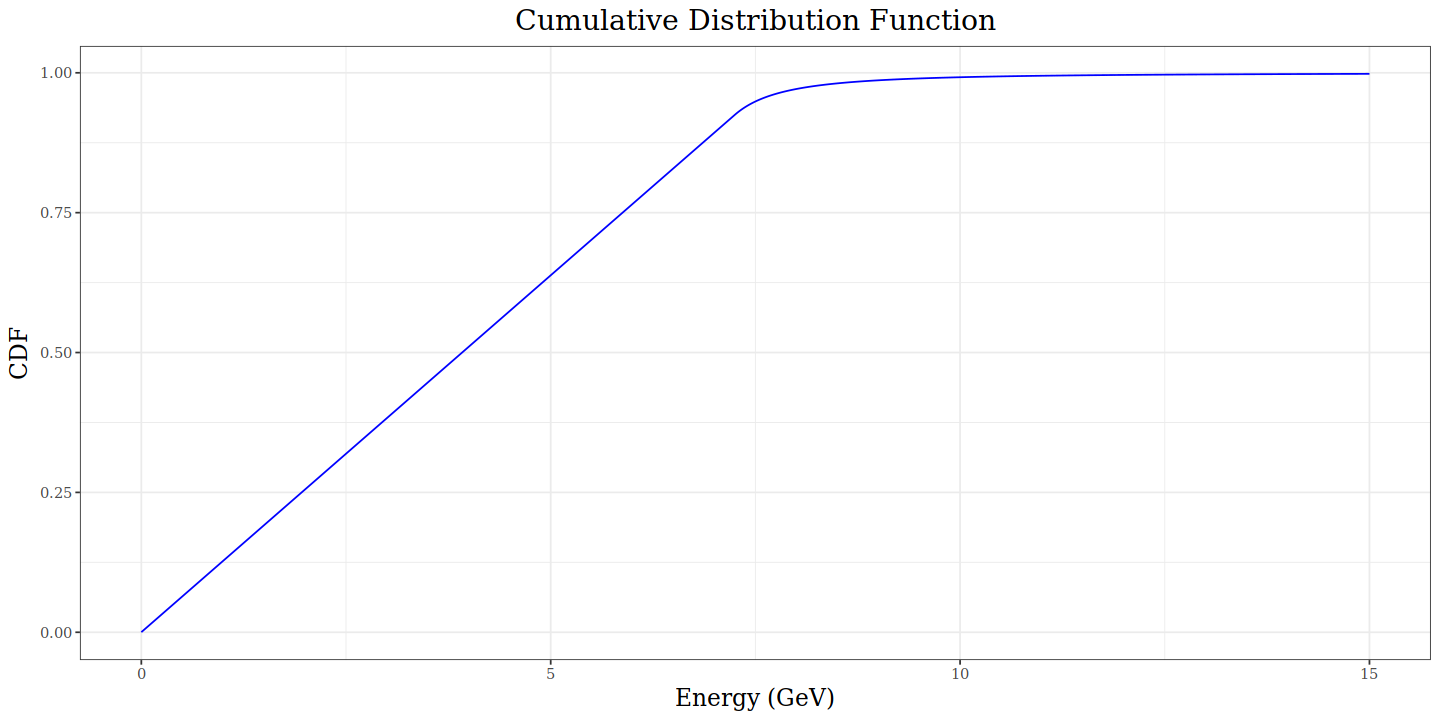

In [165]:
options(repr.plot.width = 12,repr.plot.height = 6)
cdf<-cumsum(values)*dE
p<-ggplot(data=data.frame(E,cdf), aes(x=E, y=cdf, group=1)) +
  geom_line(color="blue")+
labs(
title="Cumulative Distribution Function",
y="CDF",
x="Energy (GeV)"
)

#axis_legend()
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))


d) Compute the mean value using R

In [182]:
crpdf_mean<-function(x){
if (x<E0){
    return (x/N)}
else{
    return ((x/N)*((x-E0+1))**(-gamma))}
}
mean_value<-integrate(Vectorize(crpdf_mean),lower=0,upper=Inf)$value

In [186]:
cat("The mean value is",round(mean_value,3),"GeV")

The mean value is 4.004 GeV

### Exercise 3

- Suppose that the average number of accidents at an intersection is two per day.

a) Using Markov’s inequality, find a bound for the probability that at least five accidents will occur
tomorrow.

In [598]:
mean=2
upperbound=mean/5
cat("The upper bound is:",upperbound)

The upper bound is: 0.4

b) Using Poisson random variables, calculate the probability that at least five accidents will occur
tomorrow. Compare this value with the bound obtained in the previous point a).
1

In [600]:
x=1:10
prob=1-ppois(x,2)[4]
cat("The probability that at least five accidents will occur tomorrow is:",prob)

The probability that at least five accidents will occur tomorrow is: 0.05265302

c) Let the variance of the number of accidents be two per day. Using Chebyshev’s inequality, find a
bound on the probability that tomorrow at least five accidents will occur.

In [608]:
k=5-mean
var=2
upperbound=(var)/(k**2)
cat("Using Chebyshev's inequality we find an upperbound of:",round(upperbound,2))

Using Chebyshev's inequality we find an upperbound of: 0.22

### Exercise 4

The waiting period from the time a book is ordered until it is received is a random variable with mean
seven days and standard deviation two days. If Helen wants to be 95% sure that she receives a book by
certain date, how early should she order the book?

In [677]:
#Using chebyschev's inequality
upperbound=1-0.95
mean=7
std=2
days=mean+std*0.5*sqrt(1/(upperbound))
cat("Helen has to wait",round(days),"days")

Helen has to wait 11 days

### Exercise 5

An ordinary deck of 52 cards is divided randomly into 26 pairs. Using Chebyshev’s inequality, find
an upper bound for the probability that, at most, 10 pairs consist of a black and a red card.

In [678]:
# The probability of having different color pair
p = 2 * ( 26/52 * 26/51 )

# We have E(X) = np, var(X) = np(1-p)
E = 26 * p
var = E * (1 - p)
k <- abs( 10 - E )
upperprob <- var/(k^2)
cat("Expected number of mixed pairs E(X):",round(E),"\n", "Variance of X:", round(var_X,0), "\n","Upper bound probability:", round(upperprob,2), "\n")


Expected number of mixed pairs E(X): 13 
 Variance of X: 6 
 Upper bound probability: 0.61 


### Exercise 6

- In a stationary bus at the departure station, a passenger gets on the bus, on average every 30
seconds.

a) Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability
of having less than 4 passenger after 3 minutes.

The probability of getting more than 6 passenger after 2 minutes is  0.215

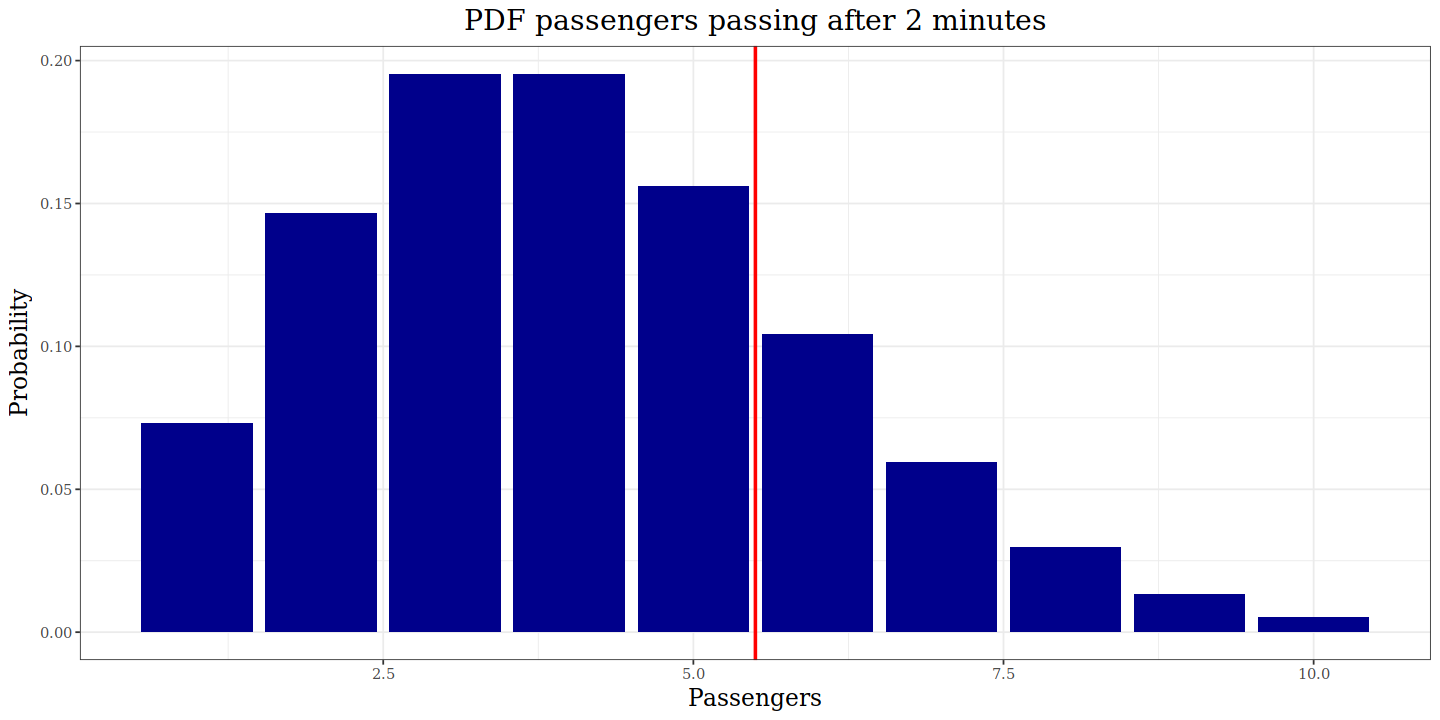

In [684]:
#The distribution describing this process is a Poisson distribution with lambda=120*(1/30)=4
lambda<-4
pass<-1:10
prob<-1-ppois(pass,lambda)[5]
cat("The probability of getting more than 6 passenger after 2 minutes is ",round(prob,3))

options(repr.plot.width = 12,repr.plot.height = 6)
dist<-dpois(pass,lambda)
p<-ggplot(data.frame(pass,dist), aes(x=pass, y=dist)) + 
  geom_bar(fill="darkblue",stat = "identity")+
labs(
title="PDF passengers passing after 2 minutes",
y="Probability",
x="Passengers"
)+geom_vline(xintercept = 5.5, color = "red", linewidth=1)
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

b) Simulate the distribution of the arrival time of the third passenger and superimpose the correspond-
ing pdf.

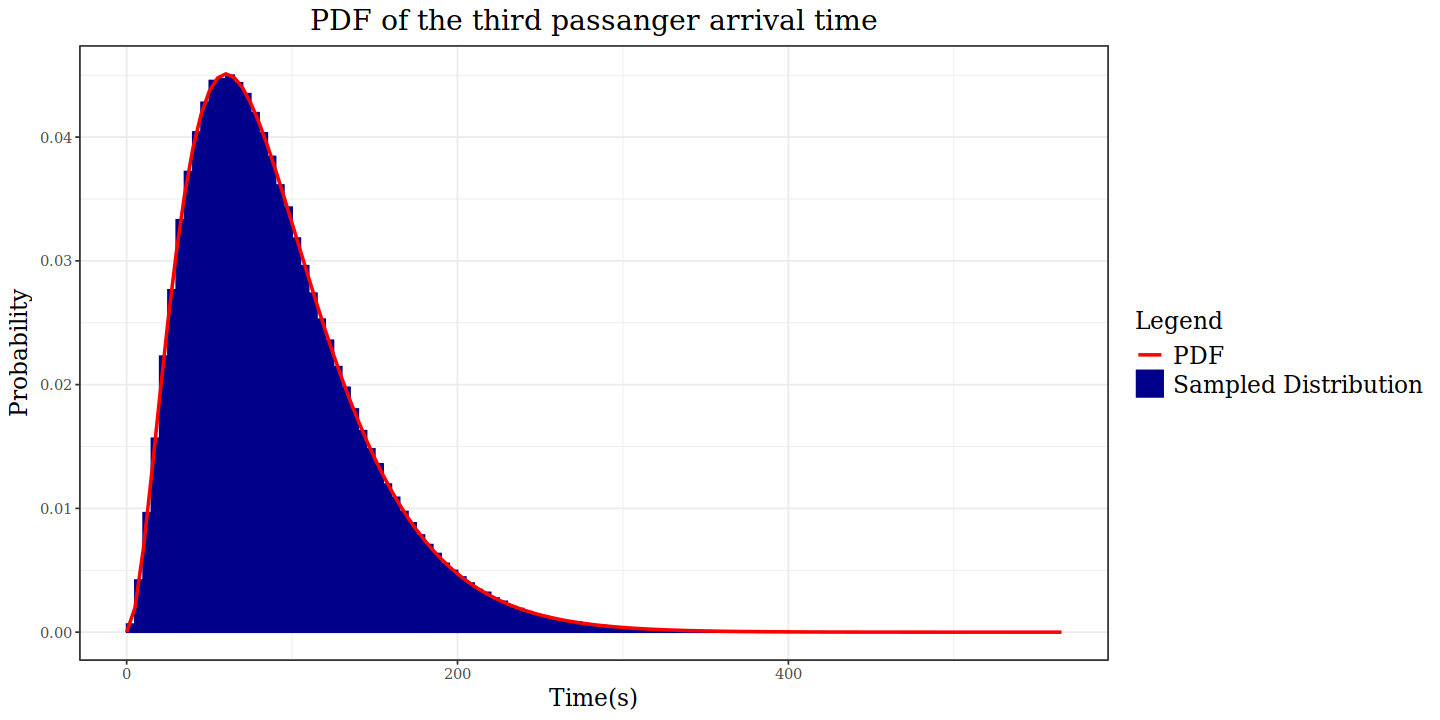

In [685]:
#The distribution describing the event is a gamma with shape=3 and rate=1/30
n_trials<-1000000
sampled_dist<-rgamma(n_trials,shape=3,rate=(1/30))

x_axis<-seq(0,max(sampled_dist),5)
dist<-dgamma(x=x_axis,shape=3,rate=(1/30))

options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data.frame(sampled_dist), aes(x=sampled_dist)) + 
geom_histogram(breaks=x_axis,aes(y=after_stat(count)/sum(after_stat(count)),colour="Sampled Distribution"),fill="darkblue",bins=100)+
geom_line(data=data.frame(x_axis,dist*10),aes(x=x_axis,y=dist*5,colour='PDF'),linewidth=1)+
scale_color_manual(name = "Legend", values = c("Sampled Distribution" = "darkblue", "PDF" = "red"))+
labs(
title="PDF of the third passanger arrival time",
y="Probability",
x="Time(s)"
)
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

c) Repeat the procedure of the point b) for the difference in arrival time between the fifth and the
first passenger.

I use the fact the the distribution of the difference between 2 non negative random variables is:
#### <center> $f_{X-Y} \, (z)=\begin{cases} \int_{0}^{\infty} f_X(x)f_Y(x-z) \,dx&for&z<0\\\int_{0}^{\infty} f_X(y+z)f_Y(y) \,dy&for&z \geq 0\end{cases}$ </center>

In [567]:
#I define some intermidiate functions to use in the estimation of the probability distribution, fun1 is f_Y and fun5 is f_X in the formula above

fun1<-function(x,z){
if(z>=0){
result<-dgamma(x=x,shape=1,rate=(1/30))
}
if(z<0){
result<-dgamma(x=x-z,shape=1,rate=(1/30))
}
return (result)
}

fun5<-function(x,z){
if(z>=0){
result<-dgamma(x=x+z,shape=5,rate=(1/30))
}
if(z<0){
result<-dgamma(x=x,shape=5,rate=(1/30))
}
return (result)
}

diff_dist<-function(z){
g<-function(x) fun5(x,z)*fun1(x,z)
return (integrate(g,lower=0,upper=Inf)$value)
}

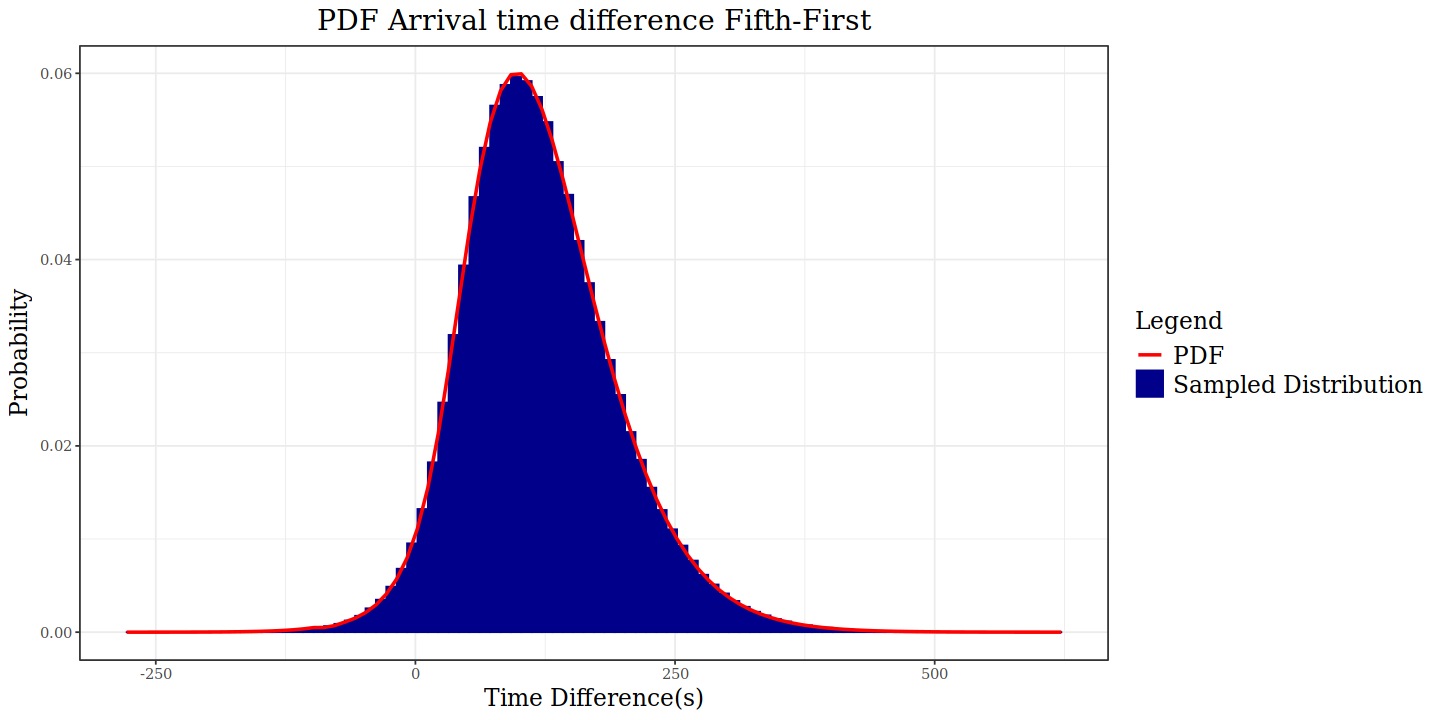

In [686]:
n_trials<-1000000
sampled_dist_first<-rgamma(n_trials,shape=1,rate=(1/30))
sampled_dist_fifth<-rgamma(n_trials,shape=5,rate=(1/30))
sampled_dist<-sampled_dist_fifth-sampled_dist_first
x_axis<-as.array(seq(min(sampled_dist),max(sampled_dist),10))
dist<-apply(X=x_axis,MARGIN=1,FUN=diff_dist)


#PLOT
options(repr.plot.width = 12,repr.plot.height = 6)
p<-ggplot(data.frame(sampled_dist), aes(x=sampled_dist)) + 
geom_histogram(breaks=x_axis,aes(y=after_stat(count)/sum(after_stat(count)),colour="Sampled Distribution"),fill="darkblue",bins=100)+
geom_line(data=data.frame(x_axis,dist*10),aes(x=x_axis,y=dist*10,colour='PDF'),linewidth=1)+
scale_color_manual(name = "Legend", values = c("Sampled Distribution" = "darkblue", "PDF" = "red"))+
labs(
title="PDF Arrival time difference Fifth-First",
y="Probability",
x="Time Difference(s)"
)
p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))